In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load The Data

In [2]:
def load_data(csv_file):
    df = pd.read_csv('AGIO.csv', parse_dates=['Date'])
    df.sort_values('Date', inplace=True)  # Ensure data is sorted by date
    df.set_index('Date', inplace=True)
    df.dropna(inplace=True)  # Remove any rows with missing data
    return df

## Calculate Moving Averages and Bollinger Bands

In [3]:
def calculate_indicators(df, short_window=50, long_window=200, bollinger_window=20, bollinger_std=2):
    # Simple Moving Averages
    df['MA_Short'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
    df['MA_Long'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
    
    # Bollinger Bands
    df['Bollinger_Middle'] = df['Close'].rolling(window=bollinger_window, min_periods=1).mean()
    df['Bollinger_Std'] = df['Close'].rolling(window=bollinger_window, min_periods=1).std()
    df['Bollinger_Upper'] = df['Bollinger_Middle'] + (df['Bollinger_Std'] * bollinger_std)
    df['Bollinger_Lower'] = df['Bollinger_Middle'] - (df['Bollinger_Std'] * bollinger_std)
    
    return df

## Identify Golden Crosses and Death Crosses

In [4]:
def identify_crosses(df):
    df['Signal'] = 0
    df['Signal'] = np.where(df['MA_Short'] > df['MA_Long'], 1, 0)
    df['Cross'] = df['Signal'].diff()
    
    golden_crosses = df[df['Cross'] == 1]
    death_crosses = df[df['Cross'] == -1]
    
    return golden_crosses, death_crosses

## Calculate On-Balance Volume (OBV)

In [5]:
def calculate_obv(df):
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    return df

## Detect Basic Candlestick Patterns

In [6]:
def detect_candlestick_patterns(df):
    # Doji: When open and close are very close
    df['Doji'] = np.abs(df['Close'] - df['Open']) < (0.1 * (df['High'] - df['Low']))
    
    # Bullish Engulfing
    df['Bullish_Engulfing'] = (
        (df['Close'] > df['Open']) &
        (df['Open'].shift(1) > df['Close'].shift(1)) &
        (df['Open'] < df['Close'].shift(1)) &
        (df['Close'] > df['Open'].shift(1))
    )
    
    # Bearish Engulfing
    df['Bearish_Engulfing'] = (
        (df['Close'] < df['Open']) &
        (df['Open'].shift(1) < df['Close'].shift(1)) &
        (df['Open'] > df['Close'].shift(1)) &
        (df['Close'] < df['Open'].shift(1))
    )
    
    return df

## Plot the Data with Indicators and Patterns

In [7]:
def plot_patterns(df, ticker):
    plt.figure(figsize=(14, 10))
    
    # Subplot 1: Price Chart with Moving Averages and Bollinger Bands
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.plot(df.index, df['MA_Short'], label='50-Day SMA', color='orange')
    ax1.plot(df.index, df['MA_Long'], label='200-Day SMA', color='magenta')
    ax1.plot(df.index, df['Bollinger_Upper'], label='Bollinger Upper', color='green', linestyle='--')
    ax1.plot(df.index, df['Bollinger_Lower'], label='Bollinger Lower', color='red', linestyle='--')
    
    # Plot Golden Crosses
    ax1.scatter(df.loc[df['Bullish_Engulfing']].index, df.loc[df['Bullish_Engulfing'], 'Close'],
                marker='^', color='green', label='Bullish Engulfing', s=100)
    
    # Plot Death Crosses
    ax1.scatter(df.loc[df['Bearish_Engulfing']].index, df.loc[df['Bearish_Engulfing'], 'Close'],
                marker='v', color='red', label='Bearish Engulfing', s=100)
    
    # Plot Doji Patterns
    ax1.scatter(df.loc[df['Doji']].index, df.loc[df['Doji'], 'Close'],
                marker='D', color='cyan', label='Doji', s=50)
    
    # Plot Golden and Death Crosses
    golden_crosses, death_crosses = identify_crosses(df)
    ax1.scatter(golden_crosses.index, golden_crosses['Close'], marker='^', color='gold', label='Golden Cross', s=150)
    ax1.scatter(death_crosses.index, death_crosses['Close'], marker='v', color='darkred', label='Death Cross', s=150)
    
    ax1.set_title(f'{ticker} Price Chart with Technical Indicators and Patterns')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # Subplot 2: On-Balance Volume (OBV)
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(df.index, df['OBV'], label='On-Balance Volume (OBV)', color='purple')
    
    ax2.set_title('On-Balance Volume (OBV)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('OBV')
    ax2.legend(loc='upper left')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

## Main Function to Execute the Workflow

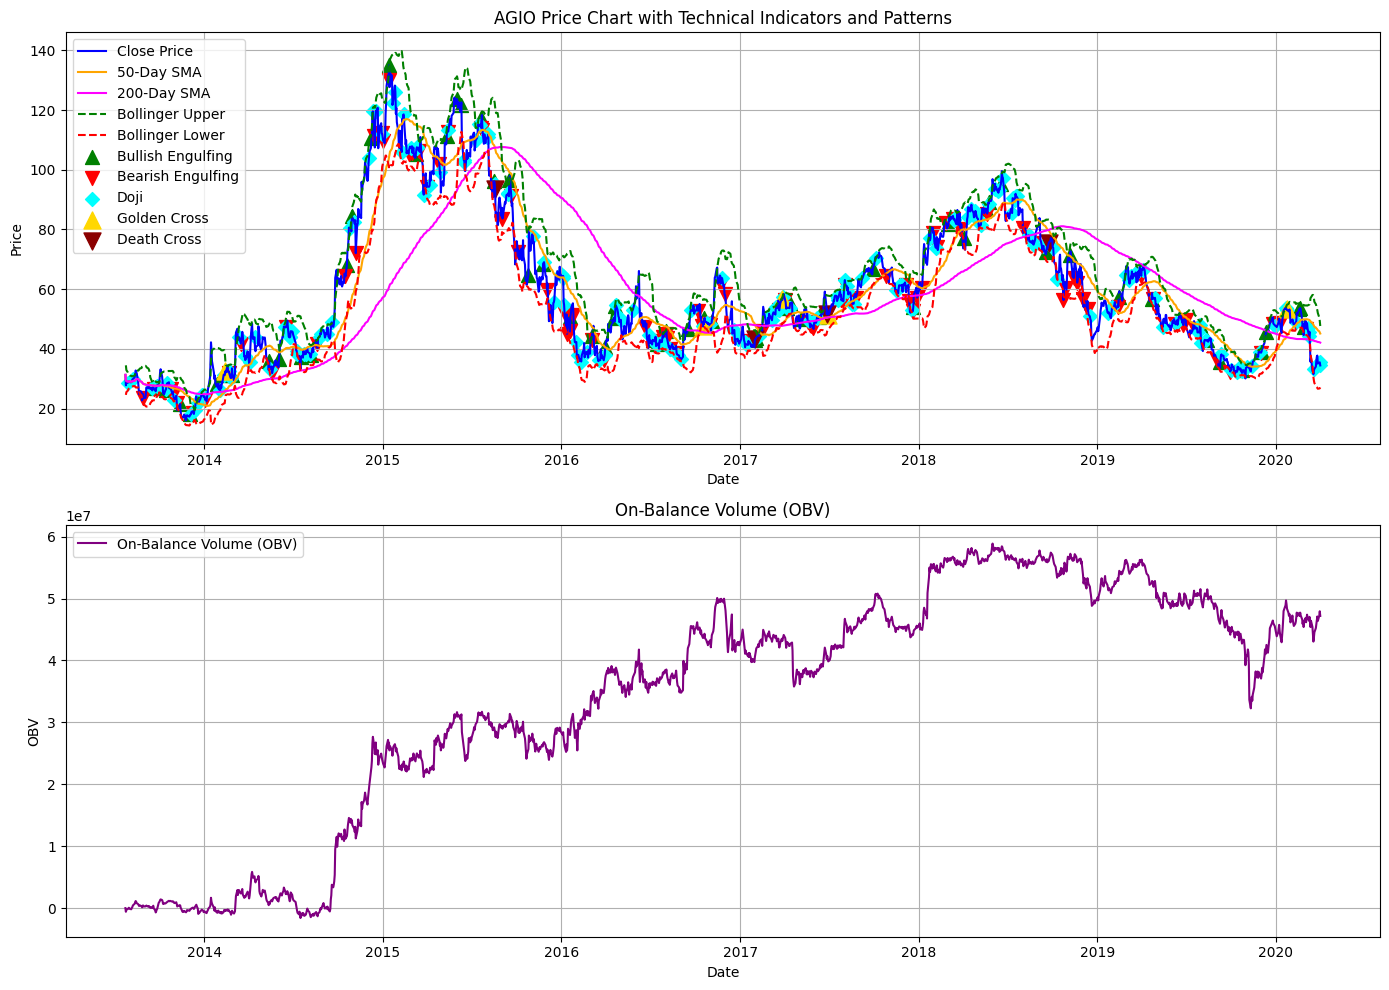

In [8]:
def main():
    # Parameters
    csv_file = 'AGIO.csv'
    ticker = 'AGIO'
    
    # Step 1: Load Data
    df = load_data(csv_file)
    
    # Step 2: Calculate Indicators
    df = calculate_indicators(df)
    
    # Step 3: Identify Golden and Death Crosses
    golden_crosses, death_crosses = identify_crosses(df)
    
    # Step 4: Calculate On-Balance Volume (OBV)
    df = calculate_obv(df)
    
    # Step 5: Detect Candlestick Patterns
    df = detect_candlestick_patterns(df)
    
    # Step 6: Plot the Data with Patterns
    plot_patterns(df, ticker)

if __name__ == "__main__":
    main()